# Primera prueba de generación de modelo a partir de feature vectores

In [1]:
# importacion de aaa ya sabes que te haces el que no
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df_dataset = pd.read_csv('first_features.csv', index_col=0)
df_dataset

,potAbsDelta,potAbsTheta,potAbsAlpha,potAbsBeta,potAbsGamma,kurtosis,RMS,skewness,media,desvio estandar,label
0,33.483541,14.177523,81.956903,141.717006,101.967390,1.240900,24.955070,0.395203,1.260070,24.923237,0.0
1,53.799310,50.624691,136.330796,139.602735,84.929012,4.371765,20.735130,0.107059,0.365863,20.731902,0.0
2,98.979875,46.794092,105.509042,211.057883,212.346049,2.660658,27.036281,0.701389,1.428164,26.998534,0.0
3,54.983670,64.382793,77.332336,267.651009,288.748001,2.069546,29.484130,0.219422,1.032189,29.466057,0.0
4,111.710939,244.347058,306.517970,435.291880,429.416725,1.304487,37.121690,0.355178,1.674864,37.083887,0.0
5,62.007023,44.427133,48.921803,72.366165,44.052993,1.795948,20.205173,0.144526,0.216827,20.204010,0.0
6,4.856088,9.323213,18.488792,18.013655,2.550403,0.448921,8.344513,-0.086968,1.650615,8.179632,0.0
7,12.402086,12.738799,17.837006,27.509635,2.217386,0.188764,9.079593,-0.247460,1.778408,8.903723,0.0
8,11.990740,23.121522,30.417384,60.359779,3.187660,-0.023238,11.247220,-0.151257,0.222435,11.245021,0.0
9,9.293412,18.296830,21.309082,29.266513,3.330018,0.638245,9.009898,-0.088502,0.420381,9.000086,0.0


In [3]:
labels = df_dataset['label']
data = df_dataset.drop(columns=['label'])
data

,potAbsDelta,potAbsTheta,potAbsAlpha,potAbsBeta,potAbsGamma,kurtosis,RMS,skewness,media,desvio estandar
0,33.483541,14.177523,81.956903,141.717006,101.967390,1.240900,24.955070,0.395203,1.260070,24.923237
1,53.799310,50.624691,136.330796,139.602735,84.929012,4.371765,20.735130,0.107059,0.365863,20.731902
2,98.979875,46.794092,105.509042,211.057883,212.346049,2.660658,27.036281,0.701389,1.428164,26.998534
3,54.983670,64.382793,77.332336,267.651009,288.748001,2.069546,29.484130,0.219422,1.032189,29.466057
4,111.710939,244.347058,306.517970,435.291880,429.416725,1.304487,37.121690,0.355178,1.674864,37.083887
5,62.007023,44.427133,48.921803,72.366165,44.052993,1.795948,20.205173,0.144526,0.216827,20.204010
6,4.856088,9.323213,18.488792,18.013655,2.550403,0.448921,8.344513,-0.086968,1.650615,8.179632
7,12.402086,12.738799,17.837006,27.509635,2.217386,0.188764,9.079593,-0.247460,1.778408,8.903723
8,11.990740,23.121522,30.417384,60.359779,3.187660,-0.023238,11.247220,-0.151257,0.222435,11.245021
9,9.293412,18.296830,21.309082,29.266513,3.330018,0.638245,9.009898,-0.088502,0.420381,9.000086


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0)
SVM = LinearSVC()
SVM.fit(X_train, y_train)
pred_Y = SVM.predict(X_test)
print(accuracy_score(y_test, pred_Y))

0.7692307692307693


<Axes: >

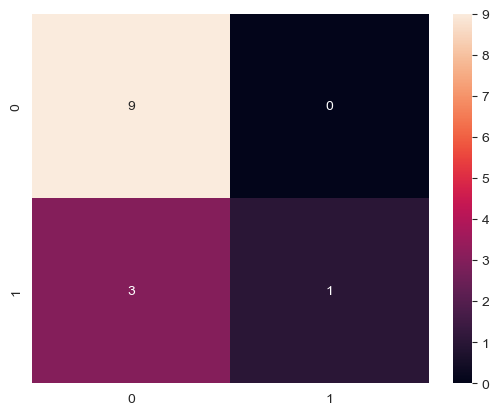

In [9]:
cm = confusion_matrix(y_test, pred_Y)
sns.heatmap(cm, annot=True)

In [7]:
rbf_SVM = SVC(kernel="rbf", random_state=0)
rbf_SVM.fit(X_train, y_train)
pred_rbf = rbf_SVM.predict(X_test)
print(accuracy_score(y_test, pred_rbf))

0.7777777777777778
